# CNN & More
---
## Easy, but Important!

## Keras Update

In [ ]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

### Library Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import keras

from keras.backend import clear_session
from keras.models import Sequential, Model
from keras.layers import Input, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import RandomRotation, RandomTranslation, RandomFlip, RandomZoom
from keras.callbacks import EarlyStopping

## Data Loading

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


* 데이터 살펴보기

id = 8769
다음 그림은 숫자 6 입니다.


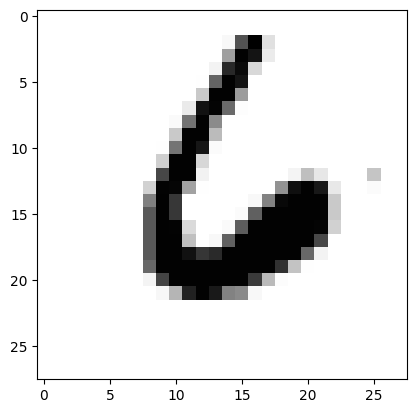

In [ ]:
id = np.random.randint(0, 10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y[id]} 입니다.')

plt.imshow(test_x[id], cmap='Greys')
plt.show()

## Data Preprocessing

* Data split
    - training set : validation set = 8 : 2
    - 재현을 위한 난수 고정 : 2024

In [ ]:
train_x, val_x, train_y, val_y  = train_test_split(train_x, train_y, test_size=.2, random_state=2024)

* Scaling
    - min-max scaling

In [ ]:
m = train_x.max()
n = train_x.min()
train_x = (train_x - n) / (m-n)
val_x = (val_x - n) / (m-n)
test_x = (test_x - n) / (m-n)

* One-Hot Encoding

In [ ]:
from keras.utils import to_categorical

train_y = to_categorical(train_y, 10)
val_y = to_categorical(val_y, 10)
test_y = to_categorical(test_y, 10)

* 흑백 정보를 명시하기 위한 reshape

In [ ]:
train_x=train_x.reshape(train_x.shape[0], 28, 28, 1)
# train_x = np.expand_dims(train_x, axis=3) 처럼 써줘도 됨
val_x=val_x.reshape(val_x.shape[0], 28, 28, 1)
test_x=test_x.reshape(test_x.shape[0], 28, 28, 1)

## Modeling : CNN

- 조건
    1. Sequential API, Functiona API 중 택일.
    2. Image Augmentation Layer를 최소 하나 이상 넣을 것! : [공식 문서 참고](https://keras.io/api/layers/preprocessing_layers/)
    3. [이 구조를 미니 버전으로 활용해봐도 좋다.](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99DFA5415B38AC752E)
    4. DropOut, BatchNormalization 등의 기능도 같이 활용해보자.
    5. Early Stopping을 사용할 것.

In [ ]:
from keras.backend import clear_session
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPool2D
from keras.layers import RandomRotation

* Sequential API

In [90]:
clear_session()

model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(RandomRotation(factor=(-0.2, 0.2))) # -20%~20% 만큼 왼/오른쪽으로 회전 → 랜덤하게 적용되는
model.add(Conv2D(
    filters=64,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    activation='relu'
))
model.add(Conv2D(
    filters=64,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    activation='relu'
))
model.add(MaxPool2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(
    filters=128,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    activation='relu'
))
model.add(Conv2D(
    filters=128,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    activation='relu'
))
model.add(MaxPool2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(
    filters=256,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    activation='relu'
))
model.add(Conv2D(
    filters=256,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    activation='relu'
))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_rotation (RandomRotation)     │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         125,450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,270,474 (4.85 MB)

 Trainable params: 1,270,090 (4.85 MB)

 Non-trainable params: 384 (1.50 KB)

* Functional API

In [96]:
clear_session()

il = Input(shape=(28,28, 1))
hl = RandomRotation(factor=(-0.2, 0.2))(il)
hl = Conv2D(64,(3, 3), (1, 1), 'same', activation = 'relu')(hl)
hl = Conv2D(64,(3, 3), (1, 1), 'same', activation = 'relu')(hl)
hl = MaxPool2D((2, 2), (2, 2))(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.4)(hl)
hl = Conv2D(128,(3, 3), (1, 1), 'same', activation = 'relu')(hl)
hl = Conv2D(128,(3, 3), (1, 1), 'same', activation = 'relu')(hl)
hl = MaxPool2D((2, 2), (2, 2))(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.4)(hl)
hl = Conv2D(256,(3, 3), (1, 1), 'same', activation = 'relu')(hl)
hl = Conv2D(256,(3, 3), (1, 1), 'same', activation = 'relu')(hl)
hl = Flatten()(hl)
ol = Dense(10, 'softmax')(hl)

model = Model(il, ol)

model.summary()
model.compile(optimizer='adam', loss='val_loss', metrics=['accuracy'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         125,450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,270,474 (4.85 MB)

 Trainable params: 1,270,090 (4.85 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
from keras.utils import plot_model

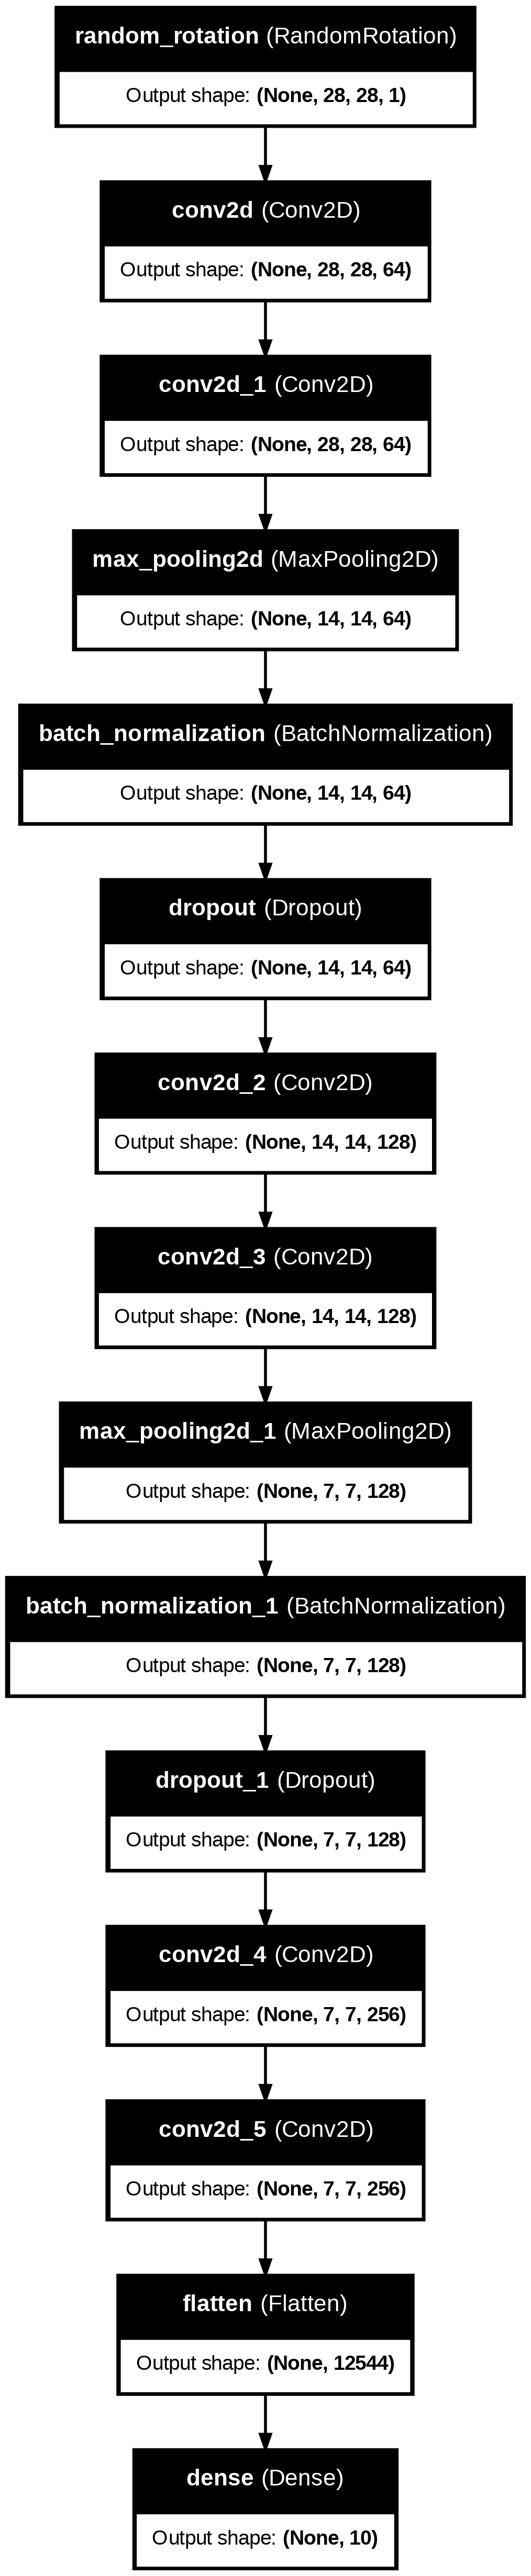

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

* Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=1,
    restore_best_weights=True
)

* **Model Checkpoint**

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
mcp = ModelCheckpoint(filepath='./model1.keras',       # 모델 저장 경로
                      monitor='val_loss',              # 모델 저장의 관심 대상
                      verbose=1,                       # 어느 시점에서 저장되는지 알려줌
                      save_best_only=True,             # 최고 성능 모델만 저장
                      save_weights_only=False)         # True : 가중치만 저장 .h5 | False : 모델 구조 포함하여 저장 .keras

* .fit( )

In [ ]:
history = model.fit(train_x, train_y, epochs = 10000, validation_data=(val_x, val_y), verbose=1, callbacks=[es, mcp])

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8669 - loss: 0.4294
Epoch 1: val_loss improved from inf to 0.08212, saving model to ./model1.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.8670 - loss: 0.4293 - val_accuracy: 0.9735 - val_loss: 0.0821
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9711 - loss: 0.0991
Epoch 2: val_loss improved from 0.08212 to 0.06018, saving model to ./model1.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - accuracy: 0.9711 - loss: 0.0991 - val_accuracy: 0.9817 - val_loss: 0.0602
Epoch 3/10000
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9752 - loss: 0.0786
Epoch 3: val_loss improved from 0.06018 to 0.05954, saving model to ./model1.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9752 - loss: 0.0786 - val_accuracy: 0.9822 - val_loss: 0.0595
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9792 - loss: 0.0670
Epoch 4: val_loss improv

In [ ]:
performance_test = model.evaluate(test_x, test_y)

print(f'Test Loss: {performance_test[0]:.6f}')
print(f'Test Accuracy: {performance_test[1]*100:.3f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9859 - loss: 0.0439
Test Loss: 0.038202
Test Accuracy: 98.870%


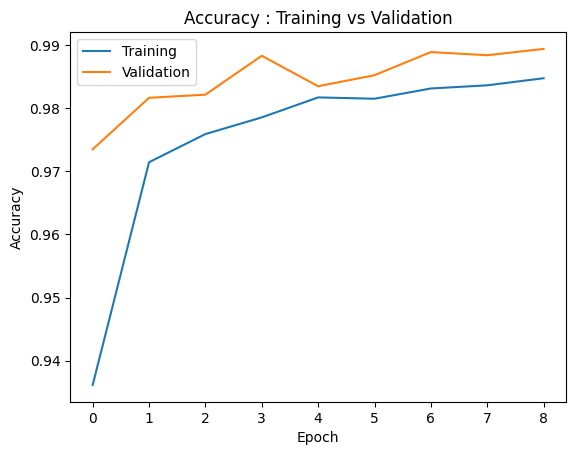

In [ ]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

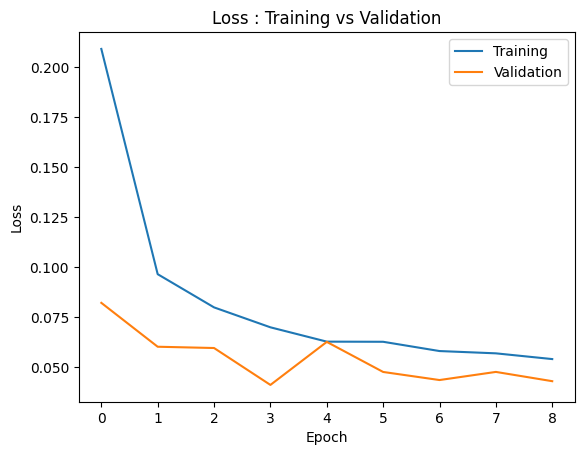

In [ ]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

## **Model Save & Load**

- .save( )
- .load_model( )

* 모델을 새롭게 저장하여 구조와 가중치 일부를 살펴보자

In [ ]:
model.save('./my_first_save.keras') # 이렇게도 저장 가능!

In [ ]:
clear_session()
model3 = keras.models.load_model('./my_first_save.keras')
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_rotation (RandomRotation)     │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         125,450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,810,656 (14.54 MB)

 Trainable params: 1,270,090 (4.85 MB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 2,540,182 (9.69 MB)

In [ ]:
model3.get_weights()[0][0][0]

array([[-0.13733111,  0.13256714,  0.10574798, -0.03852126, -0.12596078,
         0.02221097, -0.02825842, -0.01515793,  0.05591616,  0.1012708 ,
        -0.06383866,  0.06868645, -0.11048219, -0.00238138,  0.07531111,
        -0.1181499 , -0.01184731, -0.1378385 ,  0.19542442,  0.02227623,
         0.04286448, -0.0561225 ,  0.03367132,  0.08129771, -0.01145783,
        -0.01857581, -0.09910712, -0.17253879,  0.01126393, -0.08615971,
        -0.07773695, -0.13975513, -0.02928125,  0.10162146,  0.01845685,
        -0.07015349, -0.05677908,  0.08831336, -0.02287367,  0.12980618,
         0.17715876,  0.06907822,  0.15369293, -0.06556792,  0.14140123,
        -0.15958059, -0.02072407, -0.04005524,  0.06358213, -0.01319272,
        -0.08096281, -0.0329156 ,  0.09447517, -0.07511867,  0.0888733 ,
         0.01330699, -0.08034439,  0.15909766,  0.01234571,  0.00606139,
        -0.1511468 ,  0.01740669, -0.06172153,  0.11361311]],
      dtype=float32)

* 학습 과정에서 저장된 모델을 불러와 구조와 가중치 일부를 살펴보자

In [ ]:
clear_session()
model = keras.models.load_model('./model1.keras')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_rotation (RandomRotation)     │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         125,450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,810,656 (14.54 MB)

 Trainable params: 1,270,090 (4.85 MB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 2,540,182 (9.69 MB)

In [ ]:
model.get_weights()[0][0][0]

array([[-0.13733111,  0.13256714,  0.10574798, -0.03852126, -0.12596078,
         0.02221097, -0.02825842, -0.01515793,  0.05591616,  0.1012708 ,
        -0.06383866,  0.06868645, -0.11048219, -0.00238138,  0.07531111,
        -0.1181499 , -0.01184731, -0.1378385 ,  0.19542442,  0.02227623,
         0.04286448, -0.0561225 ,  0.03367132,  0.08129771, -0.01145783,
        -0.01857581, -0.09910712, -0.17253879,  0.01126393, -0.08615971,
        -0.07773695, -0.13975513, -0.02928125,  0.10162146,  0.01845685,
        -0.07015349, -0.05677908,  0.08831336, -0.02287367,  0.12980618,
         0.17715876,  0.06907822,  0.15369293, -0.06556792,  0.14140123,
        -0.15958059, -0.02072407, -0.04005524,  0.06358213, -0.01319272,
        -0.08096281, -0.0329156 ,  0.09447517, -0.07511867,  0.0888733 ,
         0.01330699, -0.08034439,  0.15909766,  0.01234571,  0.00606139,
        -0.1511468 ,  0.01740669, -0.06172153,  0.11361311]],
      dtype=float32)

* .predict( )

In [ ]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
CNN
트레이닝 정확도 : 98.97%
테스트 정확도 : 98.87%


## Visualization

* 실제 데이터 확인

id = 896
다음 그림은 숫자 0 입니다.
모델의 예측 : 0
모델의 카테고리별 확률 : [99.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
정답입니다


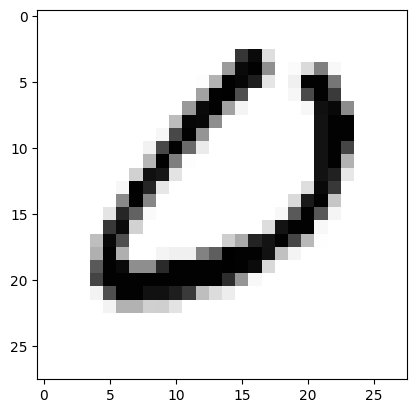

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = np.random.randint(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]), cmap='Greys')
plt.show()

* 틀린 이미지만 확인해보기

id = 3062
다음 그림은 숫자 8 입니다.
모델의 예측 : 6
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  0.  0. 69.  0. 30.  0.]
틀렸어요


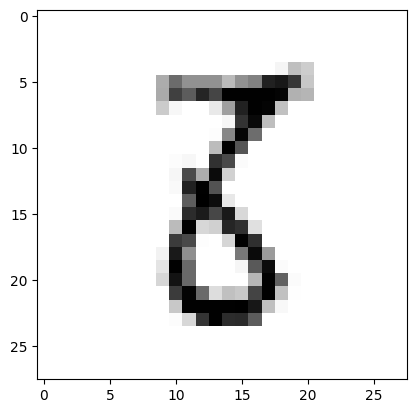

In [ ]:
true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[np.random.randint(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]), cmap='Greys')
plt.show()

# **내가 만든 손글씨 이미지는 어떻게 판단할까?**
---
## **구글 드라이브에 손글씨 이미지를 업로드!**
###**순서**
1. 그림판으로 숫자를 그려서 저장한다.
2. 구글 드라이브 첫 화면에 my_data 라는 폴더를 만든다.
3. my_data 폴더 안에 my_mnist 폴더를 만든다.
4. my_mnist 폴더 안에 1번 과정에서 만든 이미지를 업로드한다.
5. 30초 정도 기다립시다.
6. 아래의 코드들을 실행해본다.

## Connect Colaboratory with my Google Drive
- Colaboratory와 본인의 구글 드라이브를 연결하는 과정
- 아래 코드를 실행하여 폴더가 올바르게 생성 되었는지 확인

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
!ls

drive  model1.keras  model.png	my_first_save.keras  sample_data


In [104]:
!cd '/content/drive/MyDrive/KT Aivle/7. CNN/2_Data_augmentation_and_more/my_data'; ls

my_mnist


## Load Image
- 업로드 한 이미지 하나를 불러와 확인해본다

In [105]:
import glob
from keras.preprocessing import image

In [106]:
files = glob.glob('/content/drive/MyDrive/KT Aivle/7. CNN/2_Data_augmentation_and_more/my_data/my_mnist/*')
files

['/content/drive/MyDrive/KT Aivle/7. CNN/2_Data_augmentation_and_more/my_data/my_mnist/2.png',
 '/content/drive/MyDrive/KT Aivle/7. CNN/2_Data_augmentation_and_more/my_data/my_mnist/1.png',
 '/content/drive/MyDrive/KT Aivle/7. CNN/2_Data_augmentation_and_more/my_data/my_mnist/0.png',
 '/content/drive/MyDrive/KT Aivle/7. CNN/2_Data_augmentation_and_more/my_data/my_mnist/3.png',
 '/content/drive/MyDrive/KT Aivle/7. CNN/2_Data_augmentation_and_more/my_data/my_mnist/4.png',
 '/content/drive/MyDrive/KT Aivle/7. CNN/2_Data_augmentation_and_more/my_data/my_mnist/5.png',
 '/content/drive/MyDrive/KT Aivle/7. CNN/2_Data_augmentation_and_more/my_data/my_mnist/6.png',
 '/content/drive/MyDrive/KT Aivle/7. CNN/2_Data_augmentation_and_more/my_data/my_mnist/7.png',
 '/content/drive/MyDrive/KT Aivle/7. CNN/2_Data_augmentation_and_more/my_data/my_mnist/8.png',
 '/content/drive/MyDrive/KT Aivle/7. CNN/2_Data_augmentation_and_more/my_data/my_mnist/9.png']

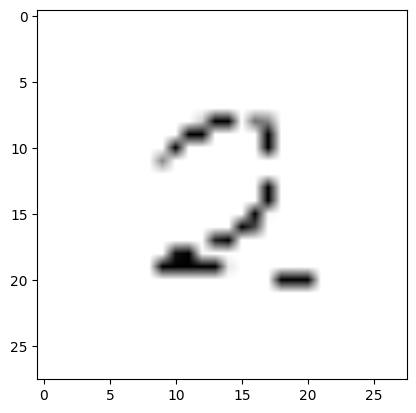

In [122]:
img = image.load_img(files[0], color_mode='grayscale', target_size=(28,28) )
img = image.img_to_array(img)

#img.shape
plt.imshow(img.reshape(img.shape[0], img.shape[1]), cmap='gray', interpolation='bilinear')
plt.show()

In [123]:
img = 255-img

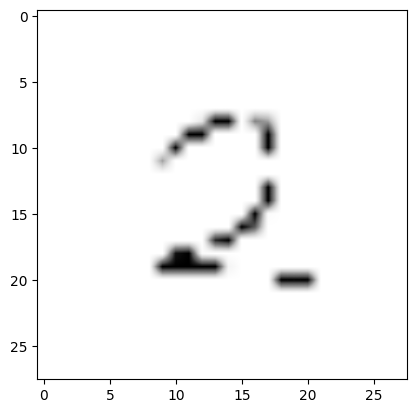

In [125]:
plt.imshow(img.reshape(img.shape[0],img.shape[1]), cmap='Greys', interpolation='bilinear' )
plt.show()

In [126]:
model.predict(img.reshape((-1,28,28,1)))[0].argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


3

## Load Images
- 업로드 한 이미지 전체를 확인해본다

In [127]:
images = []

for path in files :
    img = image.load_img(path, color_mode='grayscale', target_size=(28,28), interpolation='bilinear' )
    img = image.img_to_array(img)
    img = 255-img
    images.append(img)

images = np.array(images)

In [128]:
images.shape

(10, 28, 28, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
모델의 예측 : 3
모델의 카테고리별 확률 : [19.  2.  2. 39.  2.  2.  6.  3. 16.  3.]


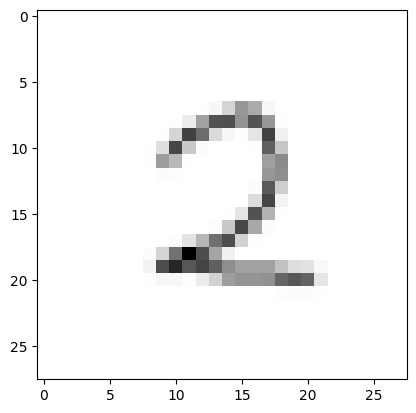

모델의 예측 : 0
모델의 카테고리별 확률 : [23.  5.  5. 13.  2.  4. 11. 14. 13.  6.]


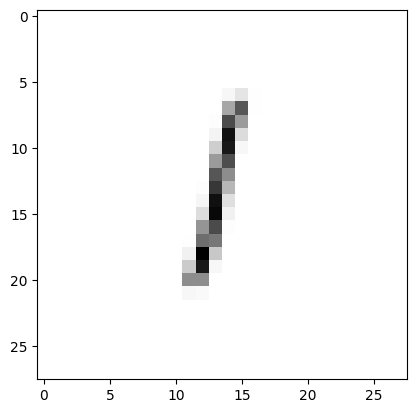

모델의 예측 : 3
모델의 카테고리별 확률 : [12.  0.  1. 56.  1.  0.  2.  1. 20.  2.]


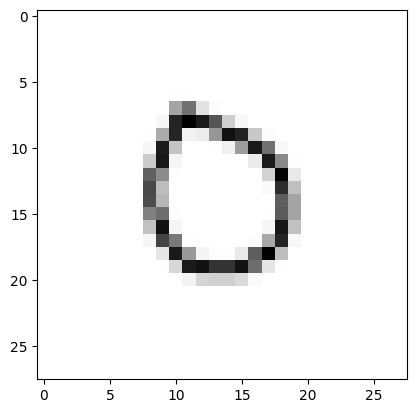

모델의 예측 : 3
모델의 카테고리별 확률 : [14.  1.  2. 36.  5.  2.  6.  6. 13. 10.]


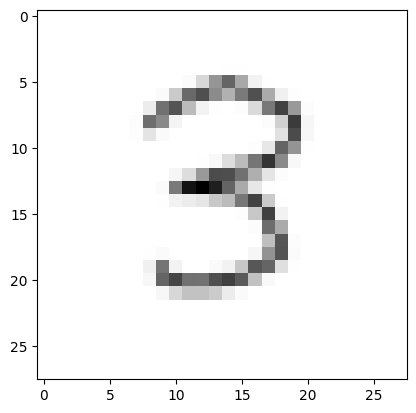

모델의 예측 : 3
모델의 카테고리별 확률 : [16.  0.  0. 50.  1.  0.  2.  3. 19.  3.]


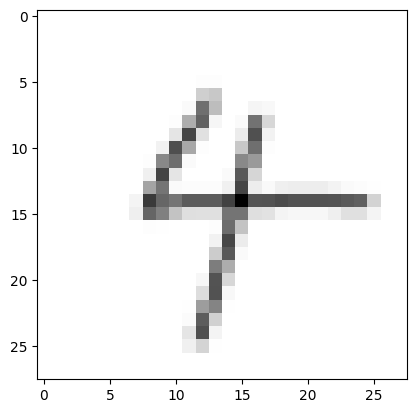

모델의 예측 : 8
모델의 카테고리별 확률 : [19.  0.  1. 25.  1.  0.  5.  5. 33.  6.]


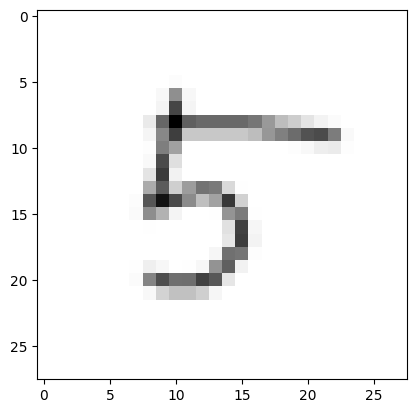

모델의 예측 : 8
모델의 카테고리별 확률 : [24.  1.  4. 13.  9.  1.  4. 12. 25.  3.]


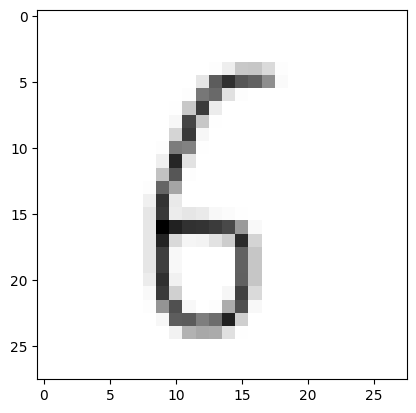

모델의 예측 : 3
모델의 카테고리별 확률 : [ 6.  1.  1. 37.  2.  3.  8.  7. 19. 10.]


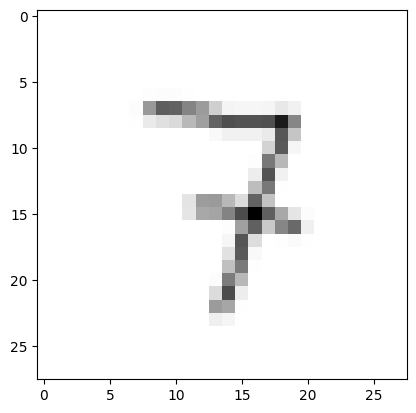

모델의 예측 : 3
모델의 카테고리별 확률 : [36.  0.  1. 38.  2.  2.  2.  2. 10.  3.]


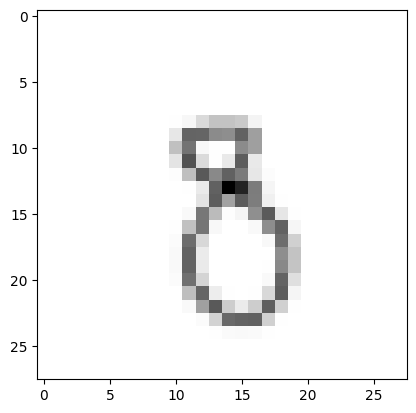

모델의 예측 : 8
모델의 카테고리별 확률 : [14.  1.  0. 21.  8.  1.  8.  8. 29.  3.]


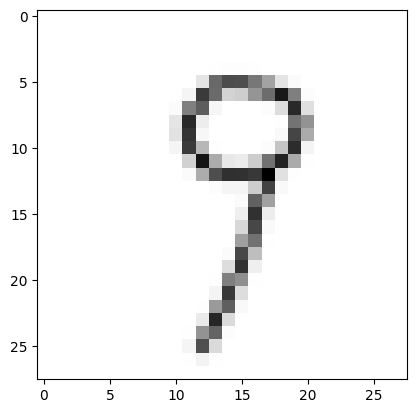

In [129]:
pred = model.predict(images)

for i in range(images.shape[0]) :
    print('====================================')
    print(f'모델의 예측 : {pred[i].argmax()}')
    print(f'모델의 카테고리별 확률 : {np.floor(pred[i]*100)}')

    plt.imshow(images[i].reshape(28,28) , cmap='Greys')
    plt.show()

---

# Extra: image_dataset_from_directory
## 이미 내가 이미지 데이터를 클래스별로 정리한 상태라면?
---
## **순서**
1. 구글 드라이브에 my_data/my_mnist2 폴더를 생성합니다.
2. my_mnist2 폴더 안에 손글씨가 폴더별로 구분되어야 한다.
    - ex) 0에 대한 이미지면 my_data/my_mnist2/0/0_1.jpg
    - ex) 1에 대한 이미지면 my_data/my_mnist2/1/1_1.jpg

In [ ]:
from keras.utils import image_dataset_from_directory

In [ ]:
# idfd_train, idfd_valid = image_dataset_from_directory('/content/drive/MyDrive/my_data/my_mnist2',
#                                                       label_mode='categorical',
#                                                       color_mode='grayscale',
#                                                       image_size=(28,28),
#                                                       seed=2024,
#                                                       validation_split=0.2,
#                                                       subset='both'
#                                                       )

idfd_train = image_dataset_from_directory('/content/drive/MyDrive/my_data/my_mnist2',
                                                      label_mode='categorical', # binary
                                                      color_mode='grayscale', # rgb
                                                      image_size=(28,28),
                                                      )

In [ ]:
clear_session()

model5 = keras.models.load_model('./model1.keras')

# model5.summary()

In [ ]:
model5.fit(idfd_train,
        #    validation_data=idfd_valid, # 알아서 폴더명을 y로 학습
           epochs=100, verbose=1)

In [ ]:
images = []

for path in files :
    img = image.load_img(path, color_mode='grayscale', target_size=(28,28), interpolation='bilinear' )
    img = image.img_to_array(img)
    img = 255-img
    images.append(img)

images = np.array(images)

In [ ]:
images.shape

In [ ]:
pred = model5.predict(images)

for i in range(images.shape[0]) :
    print('====================================')
    print(f'모델의 예측 : {pred[i].argmax()}')
    print(f'모델의 카테고리별 확률 : {np.floor(pred[i]*100)}')

    plt.imshow(images[i].reshape(28,28) , cmap='Greys')
    plt.show()